In [17]:
from sentinelhub import (
    SHConfig,
    BBox,
    CRS,
    bbox_to_dimensions,
    DataCollection,
    MimeType,
    MosaickingOrder,
    SentinelHubRequest,
)

def get_images():
    
    # put here your sentinel hub credential
    config = SHConfig()
    config.sh_client_id = "8ff68274-26f1-4692-a7d2-25dafcdac2e1"
    config.sh_client_secret = "a0axlz85GRg9bXj5DwsRCoUb9hxfCZTH8dZk4u4k"

    # customize this functions to specify the band you want to download
    evalscript = """
        //VERSION=3
        function setup() {
            return {
                input: [{
                    bands: ["DEM"],
                    units: "DN"
                }],
                output: {
                    bands: 1,
                    sampleType: "INT16"
                }
            };
        }

        function evaluatePixel(sample) {
            return [sample.DEM];
        }
    """

    # put here the coordinate of the image you want to download
    coordinates = (-88.157, 39.879, -88.150, 39.887)

    # set the coordinate reference system
    crs = CRS.WGS84

    # set the desired resolution
    resolution = 0.4

    # set the time interval
    time_interval = ("2019-01-01", "2019-12-31")

    # set the source of the image
    data_collection = DataCollection.DEM

    # set the constant class for type of mosaicking order
    mosaicking_order = MosaickingOrder.LEAST_CC

    # update this value if you want to save the image
    save_data = True

    # set the folder where you want to dowload the image
    data_folder = './data/sentinel_images'

    # set the format of the image
    response_format = MimeType.TIFF

    bbox = BBox(bbox = coordinates, crs = crs)
    size = bbox_to_dimensions(bbox, resolution = resolution)
    request = SentinelHubRequest(
        config = config,
        bbox = bbox,
        size = size,
        evalscript = evalscript,
        data_folder = data_folder,
        input_data = [
            SentinelHubRequest.input_data(
                time_interval = time_interval,
                data_collection = data_collection,
                mosaicking_order = mosaicking_order
            )
        ],
        responses = [
            SentinelHubRequest.output_response(
                identifier = "default",
                response_format = response_format
            )
        ]
    )

    return request.get_data(save_data = save_data)

In [18]:
for image in get_images():
    print(image.shape)

(2201, 1525)


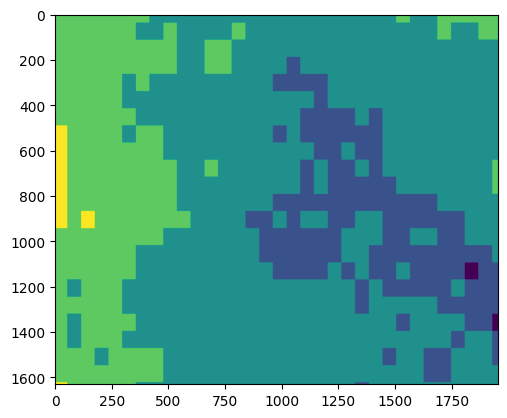

In [8]:
import rasterio 

from rasterio.plot import show

raster = rasterio.open("./data/sentinel_images/f532756bb60fccb2c1e599320ff06a12/response.tiff")

for i in range(1, raster.count + 1):
    img = raster.read(i)
    show(img)

raster.close()